<a href="https://colab.research.google.com/github/IcaroSaide/Projeto-Ciencia-de-dados/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas basicas:

In [5]:
import numpy as np
import pandas as pd

#Leitura dos dados:

In [6]:
#Leitura dos dados do Dataset.
df = pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Manipulação e limpeza dos dados:

In [7]:
#Limitando o numero de casas decimais.
pd.set_option('display.precision', 2)
#Removendo colunas sem utilidade.
df.drop(columns=['test preparation course', 'lunch'], inplace=True)

In [8]:
#Verificando se existe algum dado faltante.
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
#Alterando nome das colunas, para melhor entendimento
df.rename(columns={'gender': 'Sexo', 'race/ethnicity':'Grupo', 'parental level of education':'Nivel de escolaridade','math score':'Nota de matematica',
                   'reading score':'Nota de leitura','writing score':'Nota de escrita'},inplace=True)
df

,Sexo,Grupo,Nivel de escolaridade,Nota de matematica,Nota de leitura,Nota de escrita
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,some college,68,78,77


In [10]:
#Adição de uma nova coluna chamada Nota final, que consiste na media, somando as notas de matematica, leitura e escrita.
media = (df['Nota de escrita']+df['Nota de leitura']+df['Nota de matematica'])/3
df.insert(loc=6, column='Nota Final', value=media)
df

,Sexo,Grupo,Nivel de escolaridade,Nota de matematica,Nota de leitura,Nota de escrita,Nota Final
0,female,group B,bachelor's degree,72,72,74,72.67
1,female,group C,some college,69,90,88,82.33
2,female,group B,master's degree,90,95,93,92.67
3,male,group A,associate's degree,47,57,44,49.33
4,male,group C,some college,76,78,75,76.33
...,...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95,94.00
996,male,group C,high school,62,55,55,57.33
997,female,group C,high school,59,71,65,65.00
998,female,group D,some college,68,78,77,74.33


In [11]:
#Filtrando as melhores notas finais dos participantes do sexo feminino.
df[['Sexo','Nota Final']].loc[df['Sexo']=='female'].sort_values(by='Nota Final',  ascending=False).head(10)

,Sexo,Nota Final
962,female,100.00
458,female,100.00
114,female,99.67
712,female,99.00
179,female,99.00
165,female,98.67
685,female,97.67
903,female,97.67
957,female,97.33
566,female,97.33


In [12]:
#Filtrando numero de pessoas que conseguiram notas finais superiores as 90 pontos.
pn = df['Nota Final'].loc[df['Nota Final']>=90].count()
print('Numero de alunos com nota superior a 90 pontos:', pn, 'de', df['Nota Final'].count())

Numero de alunos com nota superior a 90 pontos: 52 de 1000


# Descritivo e exploração de dados:

In [13]:
#Agrupando os grupos participantes por sexo e nivel de escolaridade de cada grupo e apresentando dados detalhados referente a nota final.
gr = df[['Grupo','Sexo','Nota Final','Nivel de escolaridade']].groupby(['Grupo', 'Sexo','Nivel de escolaridade']).describe()
gr

Nota Final         ...               
                                          count   mean  ...    75%     max
Grupo   Sexo   Nivel de escolaridade                    ...               
group A female associate's degree           6.0  65.28  ...  73.92   89.33
               bachelor's degree            3.0  57.78  ...  61.50   67.00
               high school                  7.0  66.14  ...  76.67   83.33
               master's degree              2.0  58.50  ...  60.92   63.33
               some college                 8.0  67.83  ...  77.83   85.33
               some high school            10.0  65.70  ...  76.42   96.33
        male   associate's degree           8.0  62.83  ...  66.50   91.67
               bachelor's degree            9.0  71.22  ...  79.67   93.00
               high school                 11.0  58.18  ...  68.00   73.00
               master's degree              1.0  73.00  ...  73.00   73.00
               some college                10.0  62.53  ...  75.83   94.00
               some high school            14.0  55.69  ...  64.83   78.00
group B female associate's degree          23.0  68.84  ...  77.67   91.00
               bachelor's degree           11.0  77.09  ...  80.17   96.67
               high school                 28.0  64.95  ...  75.00   89.33
               master's degree              5.0  79.53  ...  89.33   92.67
               some college                15.0  66.47  ...  75.67   91.67
               some high school            22.0  62.56  ...  74.58   84.00
        male   associate's degree          18.0  66.87  ...  80.50   90.67
               bachelor's degree            9.0  64.22  ...  67.67   88.33
               high school                 20.0  56.67  ...  68.08   81.33
               master's degree              1.0  51.33  ...  51.33   51.33
               some college                22.0  62.95  ...  71.75   92.67
               some high school            16.0  66.67  ...  81.08   89.00
group C female associate's degree          45.0  70.79  ...  77.67   97.00
               bachelor's degree           26.0  74.03  ...  85.75   98.67
               high school                 30.0  61.88  ...  70.00   82.67
               master's degree              7.0  69.71  ...  77.50   86.33
               some college                44.0  70.02  ...  78.75   92.33
               some high school            28.0  64.64  ...  76.25   90.00
        male   associate's degree          33.0  67.45  ...  77.33   94.00
               bachelor's degree           14.0  71.79  ...  83.50   92.67
               high school                 34.0  62.73  ...  70.58   87.67
               master's degree             12.0  68.64  ...  77.00   87.00
               some college                25.0  63.91  ...  74.67   91.33
               some high school            21.0  61.17  ...  68.33   76.33
group D female associate's degree          24.0  69.89  ...  80.50   91.67
               bachelor's degree           13.0  76.00  ...  85.67   97.67
               high school                 17.0  66.31  ...  73.00   95.67
               master's degree             15.0  73.49  ...  85.83   97.33
               some college                35.0  73.93  ...  80.50   99.00
               some high school            25.0  69.32  ...  78.67   99.00
        male   associate's degree          26.0  68.82  ...  76.50   87.33
               bachelor's degree           15.0  64.56  ...  74.50   83.00
               high school                 27.0  61.69  ...  70.50   85.00
               master's degree              8.0  82.08  ...  86.17   87.67
               some college                32.0  66.61  ...  73.08   98.67
               some high school            25.0  67.91  ...  79.00   86.33
group E female associate's degree          18.0  78.48  ...  89.58  100.00
               bachelor's degree           10.0  77.03  ...  93.50  100.00
               high school                 12.0  68.42  ...  7

# Graficos que mostram insights sobre os dados:

In [14]:
#importação das bibliotecas.
import matplotlib.pyplot as plt
import seaborn as sns

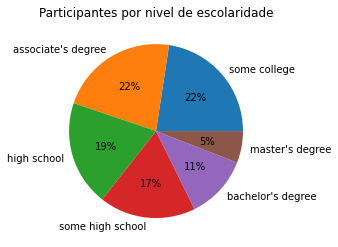

In [15]:
#Grafico apresentando porcentagem de participantes por nivel de escolaridade.
gr = df['Nivel de escolaridade'].value_counts()
plt.pie(gr, labels = gr.index, autopct='%1.i%%')
plt.title('Participantes por nivel de escolaridade')
plt.show()

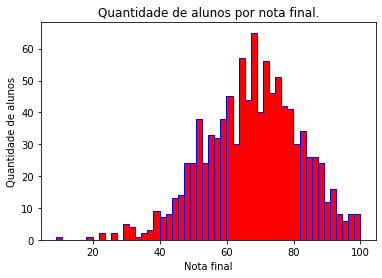

In [16]:
#Grafico que apresenta numero de alunos por nota final.
X = df['Nota Final']
plt.hist(X,bins=50,color='red', edgecolor='blue')
plt.xlabel('Nota final')
plt.ylabel('Quantidade de alunos')
plt.title('Quantidade de alunos por nota final.')
plt.show()

# Divisão dos dados em conjunto de treino e conjunto de teste:

In [17]:
#importação da biblioteca.
from sklearn.model_selection import train_test_split

In [18]:
# Separando os dados de treino e teste
b = df['Nota de escrita'].to_numpy(dtype=int, copy=True)
c = df['Nota de leitura'].to_numpy(dtype=int, copy=True)
print(b.shape, c.shape)
b_treino, b_teste, c_treino, c_teste = train_test_split(b, c, test_size=0.5, random_state=123)

(1000,) (1000,)


In [19]:
#Convertendo arrays de 1 dimenção para 2 dimesões.
b_treino = b_treino.reshape(-1,1)
b_teste = b_teste.reshape(-1,1)
c_treino = c_treino.reshape(-1,1)
c_teste = c_teste.reshape(-1,1)

# Treinando o estimador com aprendizagem supervisionada:

In [20]:
#Importação das bibliotecas.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [21]:
#Treinando o estimador
modelo = LinearRegression()
modelo.fit(b_treino,c_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Verificar desempenho do estimador:

In [22]:
#Testando a acuracia do estimador.
acuracia = modelo.score(b_teste,c_teste)
print('O nivel de acuracia do estimador é: %.2f porcento'%(acuracia*100))

O nivel de acuracia do estimador é: 91.39 porcento


In [23]:
#Extraindo coeficientes angular e linear.
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_
print('Valor do coeficiente angular: %2.f'% coef_angular)
print('Valor do coeficiente linear: %2.f'% coef_linear)

Valor do coeficiente angular:  1
Valor do coeficiente linear:  6


In [24]:
#Calculo da reta linear.
reta = coef_angular*b_teste+coef_linear

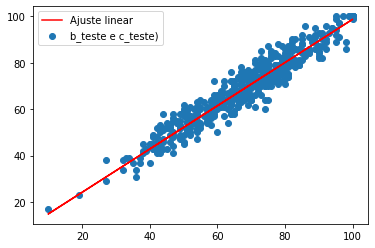

In [25]:
#Grafico que representa os pontos em relação a reta linear.
plt.scatter(b_teste,c_teste,label="b_teste e c_teste)")
plt.plot(b_teste,reta,label="Ajuste linear", color='red')
plt.legend()